In [ ]:
#Task1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1),(1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7),(1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7),(1, 1, 1)]})
print(cmap)

In [3]:
plt.colormaps.register(cmap)

In [4]:
df = pd.read_csv('possum.csv')
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [6]:
df.describe().round(2)

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.00,104.00,102.00,104.00,104.00,104.00,104.00,103.00,104.00,104.00,104.00,104.00
mean,52.50,3.62,3.83,92.60,56.88,87.09,37.01,68.46,48.13,15.05,27.00,32.59
std,30.17,2.35,1.91,3.57,3.11,4.31,1.96,4.40,4.11,1.05,2.05,2.76
min,1.00,1.00,1.00,82.50,50.00,75.00,32.00,60.30,40.30,12.80,22.00,25.00
25%,26.75,1.00,2.25,90.68,54.98,84.00,35.88,64.60,44.80,14.40,25.50,31.00
50%,52.50,3.00,3.00,92.80,56.35,88.00,37.00,68.00,46.80,14.90,27.00,32.50
75%,78.25,6.00,5.00,94.72,58.10,90.00,38.00,72.50,52.00,15.72,28.00,34.12
max,104.00,7.00,9.00,103.10,68.60,96.50,43.00,77.90,56.20,17.80,32.00,40.00


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['Pop'].value_counts(normalize=True)

Pop
other    0.557692
Vic      0.442308
Name: proportion, dtype: float64

In [9]:
from phik.report import plot_correlation_matrix

interval columns not set, guessing: ['case', 'site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']


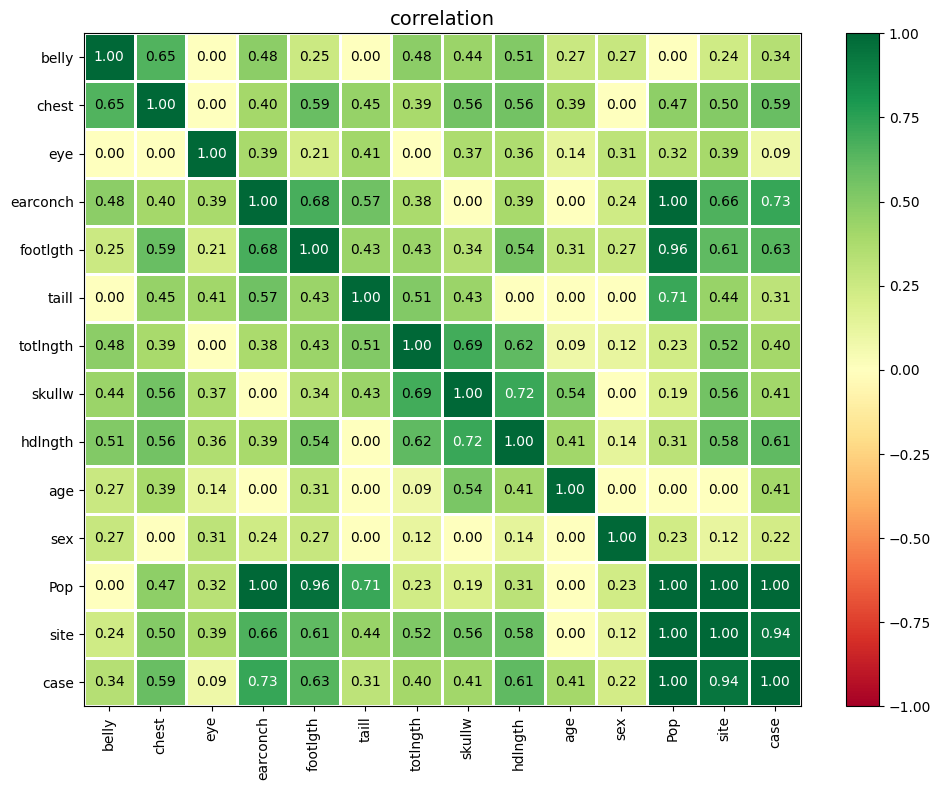

In [10]:
# visualizing the correlation matrix
phik_matrix = df.phik_matrix()
plot_correlation_matrix(phik_matrix.values, x_labels=phik_matrix.columns, y_labels=phik_matrix.index, figsize=(10, 8))

In [11]:
df = df.drop(['site', 'case', 'age', 'footlgth'], axis = 1)

In [12]:
# 'Vic' = 0
# 'Other' = 1
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [13]:
label_encoder = LabelEncoder()
df['Pop'] = label_encoder.fit_transform(df['Pop'])

In [17]:
X = df[['hdlngth', 'skullw', 'totlngth', 'taill', 'earconch', 'eye', 'chest', 'belly']]
y = df['Pop']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [25]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [29]:
y_pred = lda.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1])

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of LDA model: {accuracy:.2f}")

Accuracy of LDA model: 1.00


In [ ]:
#Task2

In [35]:
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [201]:
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
X = df[features]

In [202]:
# Data standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [203]:
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

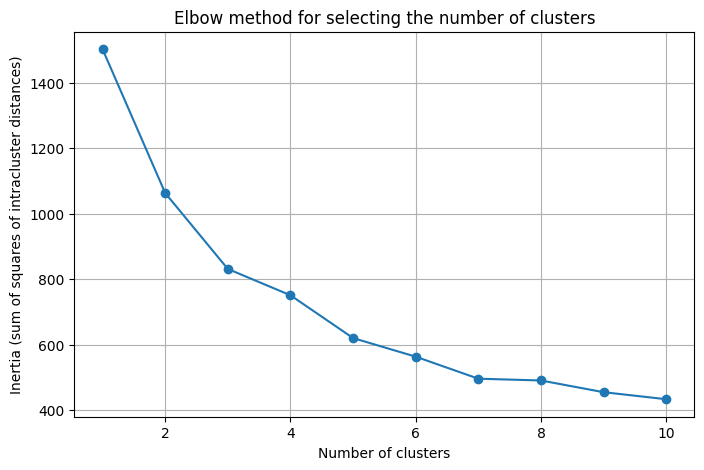

In [204]:
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title("Elbow method for selecting the number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia (sum of squares of intracluster distances)")
plt.grid()
plt.show()

In [205]:
# Based on the elbow graph, select the optimal number of clusters
optimal_clusters = 5

In [206]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

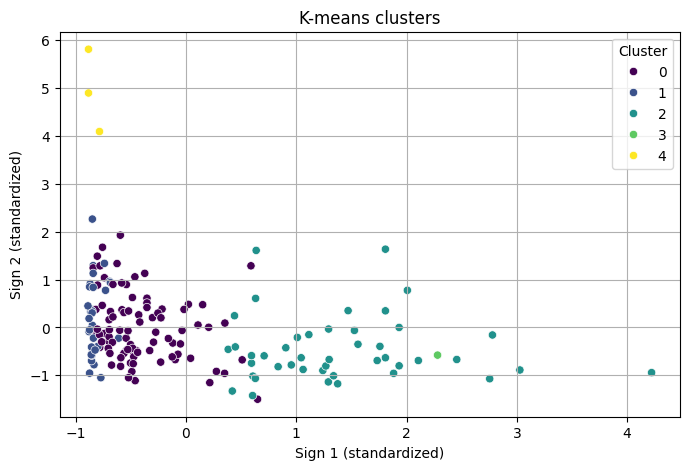

In [207]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette="viridis")
plt.title("K-means clusters")
plt.xlabel("Sign 1 (standardized)")
plt.ylabel("Sign 2 (standardized)")
plt.legend(title="Cluster")
plt.grid()
plt.show()

In [208]:
silhouette_avg = silhouette_score(X_scaled, kmeans_labels)
print(f"Average silhouette coefficient for K-means: {silhouette_avg:.2f}")

Average silhouette coefficient for K-means: 0.30


In [209]:
#The average silhouette coefficient for K-means equal to 0.3 indicates poor clustering. Try another clustering method.

In [210]:
#Hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
agg_labels = agg_clustering.fit_predict(X_scaled)

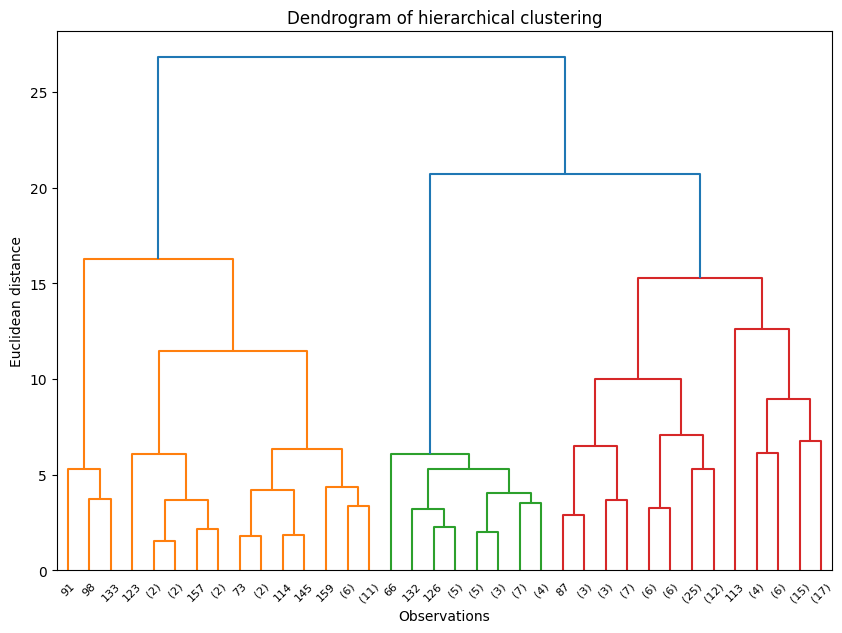

In [211]:
#Construction of a dendrogram
plt.figure(figsize=(10, 7))
linked = linkage(X_scaled, method='ward')
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram of hierarchical clustering")
plt.xlabel("Observations")
plt.ylabel("Euclidean distance")
plt.show()

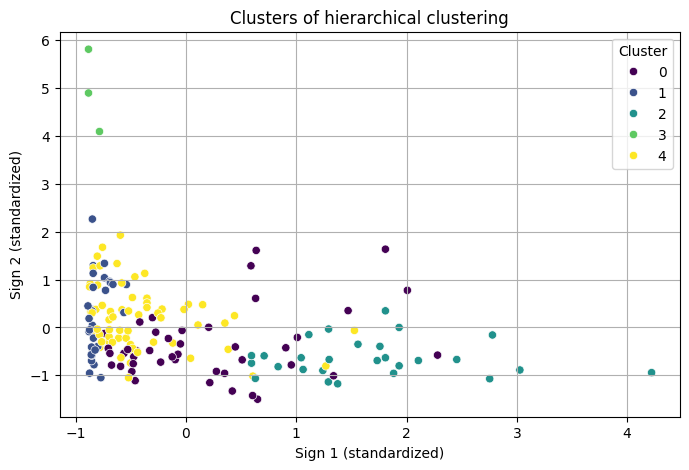

In [212]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=agg_labels, palette="viridis")
plt.title("Clusters of hierarchical clustering")
plt.xlabel("Sign 1 (standardized)")
plt.ylabel("Sign 2 (standardized)")
plt.legend(title="Cluster")
plt.grid()
plt.show()

In [213]:
silhouette_avg = silhouette_score(X_scaled, agg_labels)
print(f"Average silhouette coefficient for hierarchical clustering: {silhouette_avg:.2f}")

Average silhouette coefficient for hierarchical clustering: 0.22


In [214]:
# DBSCAN clastering
from sklearn.cluster import DBSCAN

In [215]:
dbscan = DBSCAN(eps=1.2, min_samples=5)

In [216]:
dbscan_labels = dbscan.fit_predict(X_scaled)

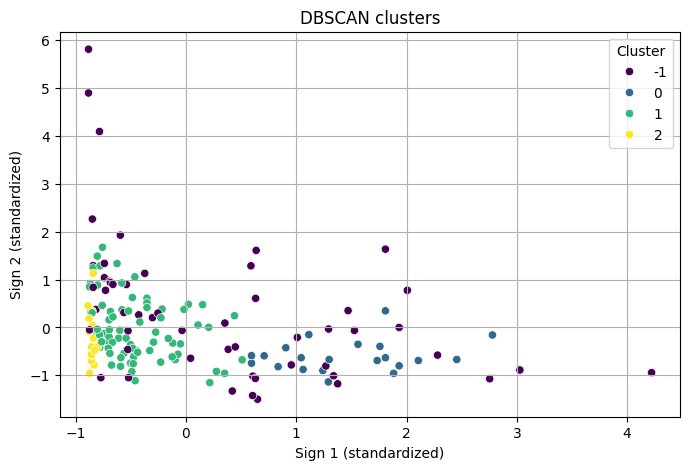

In [217]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dbscan_labels, palette="viridis", legend="full")
plt.title("DBSCAN сlusters")
plt.xlabel("Sign 1 (standardized)")
plt.ylabel("Sign 2 (standardized)")
plt.legend(title="Cluster")
plt.grid()
plt.show()

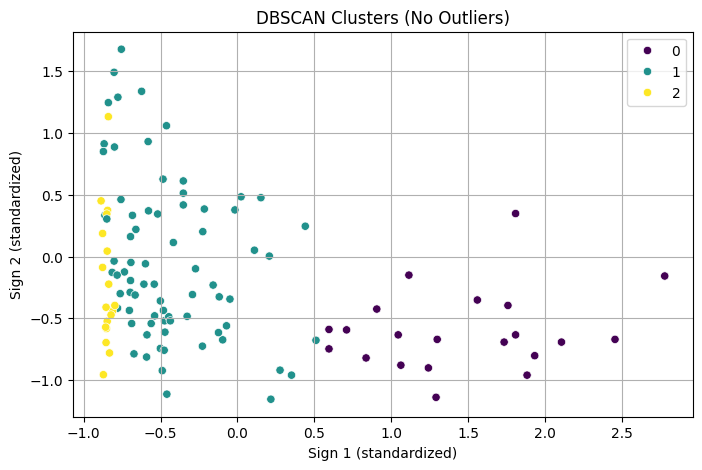

In [218]:
filtered_data = X_scaled[dbscan_labels != -1]
filtered_labels = dbscan_labels[dbscan_labels != -1]

# Visualize the result without outliers
plt.figure(figsize=(8, 5))
sns.scatterplot(x=filtered_data[:, 0], y=filtered_data[:, 1], hue=filtered_labels, palette="viridis", legend="full")
plt.title("DBSCAN Clusters (No Outliers)")
plt.xlabel("Sign 1 (standardized)")
plt.ylabel("Sign 2 (standardized)")
plt.grid()
plt.show()

In [219]:
# Eliminate outliers (label -1)
mask = dbscan_labels != -1
X_scaled_filtered = X_scaled[mask]
dbscan_labels_filtered = dbscan_labels[mask]

# Calculate the silhouette coefficient for clusters without outliers
silhouette_avg_dbscan = silhouette_score(X_scaled_filtered, dbscan_labels_filtered)
print(f"Average silhouette coefficient for DBSCAN: {silhouette_avg_dbscan:.2f}")

Average silhouette coefficient for DBSCAN: 0.39


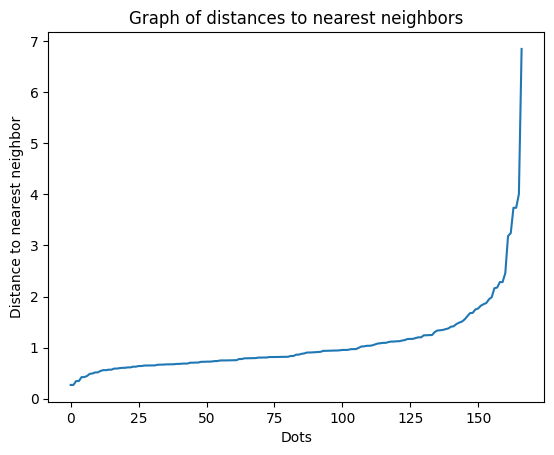

In [220]:
#Additional calculations to find the optimal value 'eps'

from sklearn.neighbors import NearestNeighbors

# Finding distances to nearest neighbors
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sorting distances
distances = np.sort(distances[:, 1], axis=0)

# We are building a graph
plt.plot(distances)
plt.title('Graph of distances to nearest neighbors')
plt.xlabel('Dots')
plt.ylabel('Distance to nearest neighbor')
plt.show()

In [221]:
#Based on the graph, we can assume that the optimal value of 'eps' is approximately 1.2.(axis y)